# Location Extraction and Mapping

### Things to achieve in this notebook

- Extract a point location for each tweet
- Map the tweets
- Use this to pick sensible areas to focus on
- Split tweets into locations

In [1]:
## Import libraries

import matplotlib.pyplot as plt                               # Used for plotting data
from collections import Counter                               # This is used to count occurances of values
import pandas as pd                                           # Used for cleanly displaying data
import numpy as np                                            # Collection of mathematical functions
import tarfile                                                # Used for extracting files
import json                                                   # Processing individual JSON files uses this
import csv                                                    # This was used to create and read csvs
import string
import pickle
import os                                                     # This helped locate and delete json files
import re
import cartopy
from ast import literal_eval                                  # Used to convert strings to dict
from datetime import datetime                                 # This processes different date formats
from pandas.plotting import register_matplotlib_converters    # This had to be registered to allow for timeseries plots
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from emoji import demojize
from langdetect import detect
from multiprocessing import Process
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt
from matplotlib.patches import Rectangle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import  confusion_matrix
register_matplotlib_converters()
pd.set_option('display.max_rows', 10)                         # Setting displayed panda length

ImportError: cannot import name 'DateFormatter' from 'matplotlib' (C:\Users\beckr\Anaconda3\lib\site-packages\matplotlib\__init__.py)

In [35]:
# For ease of indexing

ID = 0
timestamp = 1
place = 2
text = 3
coord = 4
sentiment = 5
point = 7

### Need a loop over the final data which takes in the location information and extracts a single point.

In [37]:
loc_latarray = []
loc_longarray = []

if os.path.exists('HeatLocatedCSV.csv'):                                                # Prevents overlap of files
    os.remove('HeatLocatedCSV.csv')

with open('HeatLocatedCSV.csv', "a+", encoding='utf-8', newline='') as csvfile:         # Loop for all files in File_Locations
    writer = csv.writer(csvfile)

    with open('HeatFilter3CSV.csv', "r", encoding='utf-8') as current: 
        reader = csv.reader(current)
           
        for line in reader:
            
            loc = literal_eval(line[coord])
            new_loc = [0,0]
            if len(loc) == 4:
                new_loc[0] = (loc[0]+loc[2])/2
                new_loc[1] = (loc[1]+loc[3])/2
                loc = new_loc
            
            loc_latarray = np.append(loc_latarray, loc[0])
            loc_longarray = np.append(loc_longarray, loc[1])
            
            writer.writerow(line + [loc])
        

## Mapping
- Need to grab the coordinates 
    - Probably need to work on the bit above: decide on type, find middle of boxes, get in the same form (maybe)
- Map them - choose places with big clusters to work with.

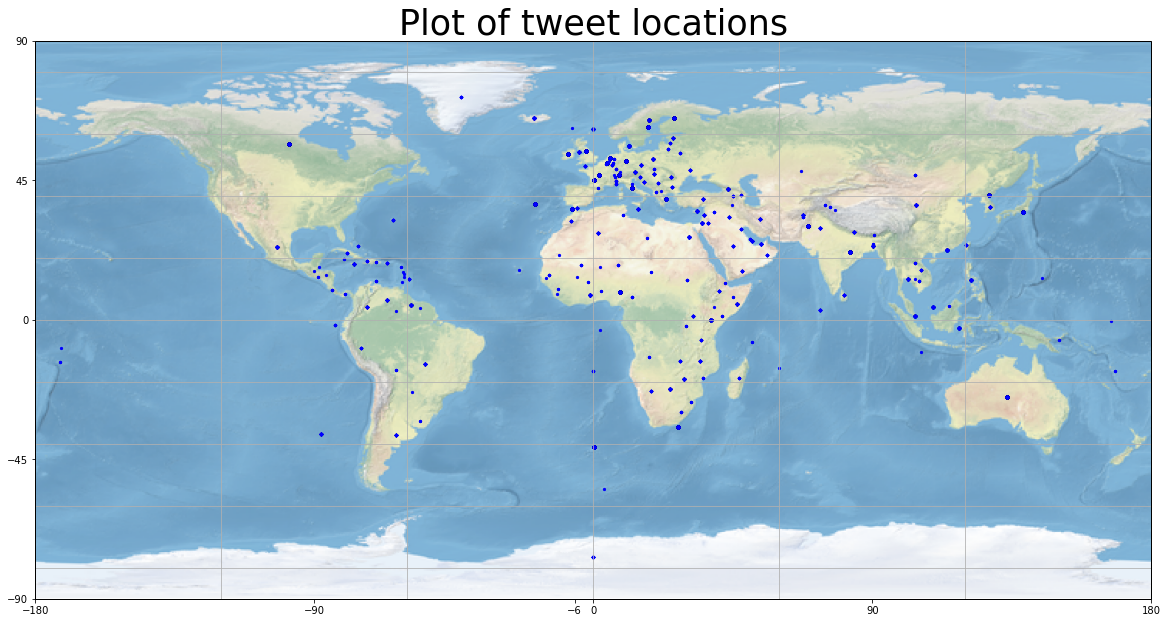

In [38]:
plt.figure(figsize = [20,20])                                           # This creates the background image and fig size 
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.stock_img()
ax.set_xticks([-180, -90., -6 , 0, 90, 180.], crs=None)
ax.set_yticks([-90, -45., 0, 45, 90.], crs=None)
ax.gridlines(crs=None)

plt.scatter(loc_latarray[:], loc_longarray[:], c = 'b', s = 5)

plt.title('Plot of tweet locations', size = 35)
plt.show()

## Pick locations
- Canada (Ontario)
- UK
- Ireland
- Sweden
- India (Kolkata and New Delhi)
- Texas
- Australia

**Other areas in Europe, Asia and Africa have substantial tweets but we want places were local people tweet predominantly in English**

## Split the data

- Canada tweets box: -100,-90  45, 80
- UK box: -8,0  50,60
- Ireland box: -10,-8  50,60
- Sweden: 11,26  61,67
- India (Kolkata): 79,95 16,28
- India (New Delhi): 70,85 19,32  
- Texas: -120,-90  19,36
- Australia: 106,165 -45,-10

Boxes chosen by inspection to best group relevent data points with help from bboxfinder.com

In [39]:
with open('HeatCanadaCSV.csv', "a+", encoding='utf-8', newline='') as csvfile1:         
    writer1 = csv.writer(csvfile1)

    with open('HeatUKCSV.csv', "a+", encoding='utf-8', newline='') as csvfile2:         
        writer2 = csv.writer(csvfile2)

        with open('HeatIrelandCSV.csv', "a+", encoding='utf-8', newline='') as csvfile3:         
            writer3 = csv.writer(csvfile3)

            with open('HeatSwedenCSV.csv', "a+", encoding='utf-8', newline='') as csvfile4:         
                writer4 = csv.writer(csvfile4)
                
                with open('HeatIndiaKCSV.csv', "a+", encoding='utf-8', newline='') as csvfile5:         
                    writer5 = csv.writer(csvfile5)
                    
                    with open('HeatIndiaNDCSV.csv', "a+", encoding='utf-8', newline='') as csvfile6:         
                        writer6 = csv.writer(csvfile6)
                    
                        with open('HeatAustraliaCSV.csv', "a+", encoding='utf-8', newline='') as csvfile7:         
                            writer7 = csv.writer(csvfile7)
                        
                            with open('HeatTexasCSV.csv', "a+", encoding='utf-8', newline='') as csvfile8:         
                                writer8 = csv.writer(csvfile8)


                                with open('HeatLocatedCSV.csv', "r", encoding='utf-8') as current: 
                                    reader = csv.reader(current)

                                    for line in reader:
                                        coord = literal_eval(line[6])

                                        if -100<coord[0]<-90 and 45<coord[1]<80:
                                            writer1.writerow(line)

                                        elif -8<coord[0]<-0 and 50<coord[1]<60:
                                            writer2.writerow(line)

                                        elif -10<coord[0]<-8 and 50<coord[1]<60:
                                            writer3.writerow(line)   

                                        elif 11<coord[0]<26 and 61<coord[1]<67:
                                            writer4.writerow(line)

                                        elif 79<coord[0]<95 and 16<coord[1]<28:
                                            writer5.writerow(line)
                                             
                                        elif 70<coord[0]<85 and 19<coord[1]<32:
                                            writer6.writerow(line)

                                        elif 106<coord[0]<165 and -45<coord[1]<-10:
                                            writer7.writerow(line)

                                        elif -120<coord[0]<-90 and 19<coord[1]<36:
                                            writer8.writerow(line)
                                        